<a href="https://colab.research.google.com/github/123nol/SSM/blob/main/pendulum_simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

dicrete time


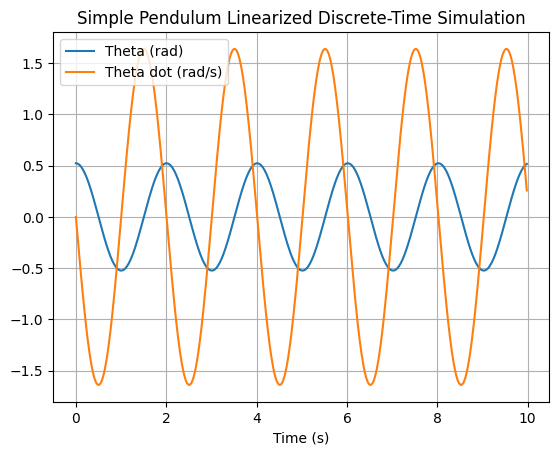

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import StateSpace, cont2discrete, dlsim

# Pendulum parameters
m = 1.0      # mass (kg)
l = 1.0      # length (m)
g = 9.81     # gravity (m/s^2)

# Linearized state-space matrices
A = np.array([[0, 1],
              [-(g/l), 0]])
B = np.array([[0],
              [1/(m*l**2)]])
C = np.eye(2)
D = np.zeros((2, 1))

# Discretization parameters
dt = 0.02  # Sampling time (s)
sysd = cont2discrete((A, B, C, D), dt)
Ad, Bd, Cd, Dd, _ = sysd

# Create discrete-time state-space system
sys_discrete = StateSpace(Ad, Bd, Cd, Dd, dt=dt)

# Simulation parameters
t = np.arange(0, 10, dt)
u = np.zeros_like(t)  # No input torque
x0 = [np.pi/6, 0]     # Initial state: 30 degrees, zero velocity

# Simulate discrete-time system
tout, yout, xout = dlsim(sys_discrete, u, t, x0=x0)

plt.plot(tout, yout[:, 0], label='Theta (rad)')
plt.plot(tout, yout[:, 1], label='Theta dot (rad/s)')
plt.title('Simple Pendulum Linearized Discrete-Time Simulation')
plt.xlabel('Time (s)')
plt.legend()
plt.grid()
plt.show()

continious time

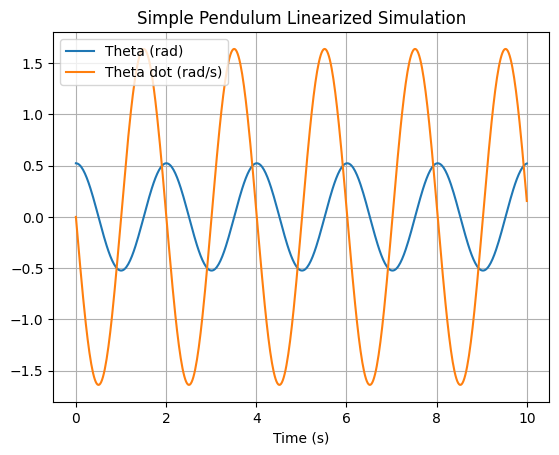

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import StateSpace, lsim

# Pendulum parameters
m = 1.0      # mass (kg)
l = 1.0      # length (m)
g = 9.81     # gravity (m/s^2)

# Linearized state-space matrices
A = np.array([[0, 1],
              [-(g/l), 0]])
B = np.array([[0],
              [1/(m*l**2)]])
C = np.eye(2)
D = np.zeros((2, 1))

# Create state-space system
sys = StateSpace(A, B, C, D)

# Simulation parameters
t = np.linspace(0, 10, 500)
u = np.zeros_like(t)  # No input torque
x0 = [np.pi/6, 0]     # Initial state: 30 degrees, zero velocity

# Simulate linear system
tout, yout, xout = lsim(sys, U=u, T=t, X0=x0)

plt.plot(tout, yout[:, 0], label='Theta (rad)')
plt.plot(tout, yout[:, 1], label='Theta dot (rad/s)')
plt.title('Simple Pendulum Linearized Simulation')
plt.xlabel('Time (s)')
plt.legend()
plt.grid()
plt.show()